In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt  

In [3]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report 

In [4]:
bank= pd.read_csv("bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,32,management,single,tertiary,no,47,no,no,cellular,19.0,aug,133.0,4.0,-1.0,0.0,unknown,no
21561,49,technician,married,secondary,no,673,yes,no,cellular,19.0,aug,501.0,2.0,-1.0,0.0,unknown,no
21562,49,technician,divorced,secondary,no,5,no,no,cellular,19.0,aug,131.0,2.0,-1.0,0.0,unknown,no
21563,45,admin.,married,secondary,no,740,no,yes,cellular,19.0,aug,109.0,2.0,-1.0,0.0,unknown,no


In [5]:
bank.head(10)
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      1
day          1
month        1
duration     1
campaign     1
pdays        1
previous     1
poutcome     1
y            1
dtype: int64

In [6]:
bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565 entries, 0 to 21564
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        21565 non-null  int64  
 1   job        21565 non-null  object 
 2   marital    21565 non-null  object 
 3   education  21565 non-null  object 
 4   default    21565 non-null  object 
 5   balance    21565 non-null  int64  
 6   housing    21565 non-null  object 
 7   loan       21565 non-null  object 
 8   contact    21564 non-null  object 
 9   day        21564 non-null  float64
 10  month      21564 non-null  object 
 11  duration   21564 non-null  float64
 12  campaign   21564 non-null  float64
 13  pdays      21564 non-null  float64
 14  previous   21564 non-null  float64
 15  poutcome   21564 non-null  object 
 16  y          21564 non-null  object 
dtypes: float64(5), int64(2), object(10)
memory usage: 2.8+ MB


In [7]:
# One-Hot Encoding of categrical variables
data=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,no,2143,yes,no,5.0,261.0,1.0,-1.0,0.0,...,1,0,0,0,1,1,0,0,0,1
1,44,no,29,yes,no,5.0,151.0,1.0,-1.0,0.0,...,0,0,0,0,1,1,0,0,0,1
2,33,no,2,yes,yes,5.0,76.0,1.0,-1.0,0.0,...,0,0,0,0,1,1,0,0,0,1
3,47,no,1506,yes,no,5.0,92.0,1.0,-1.0,0.0,...,0,1,0,0,1,1,0,0,0,1
4,33,no,1,no,no,5.0,198.0,1.0,-1.0,0.0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,32,no,47,no,no,19.0,133.0,4.0,-1.0,0.0,...,1,0,1,0,0,1,1,0,0,0
21561,49,no,673,yes,no,19.0,501.0,2.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,0
21562,49,no,5,no,no,19.0,131.0,2.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,0
21563,45,no,740,no,yes,19.0,109.0,2.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,0


In [8]:
# To see all columns
pd.set_option("display.max.columns", None)
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,no,2143,yes,no,5.0,261.0,1.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,44,no,29,yes,no,5.0,151.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,33,no,2,yes,yes,5.0,76.0,1.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,47,no,1506,yes,no,5.0,92.0,1.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
4,33,no,1,no,no,5.0,198.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,32,no,47,no,no,19.0,133.0,4.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
21561,49,no,673,yes,no,19.0,501.0,2.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
21562,49,no,5,no,no,19.0,131.0,2.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
21563,45,no,740,no,yes,19.0,109.0,2.0,-1.0,0.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565 entries, 0 to 21564
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  21565 non-null  int64  
 1   default              21565 non-null  object 
 2   balance              21565 non-null  int64  
 3   housing              21565 non-null  object 
 4   loan                 21565 non-null  object 
 5   day                  21564 non-null  float64
 6   duration             21564 non-null  float64
 7   campaign             21564 non-null  float64
 8   pdays                21564 non-null  float64
 9   previous             21564 non-null  float64
 10  y                    21564 non-null  object 
 11  job_admin.           21565 non-null  uint8  
 12  job_blue-collar      21565 non-null  uint8  
 13  job_entrepreneur     21565 non-null  uint8  
 14  job_housemaid        21565 non-null  uint8  
 15  job_management       21565 non-null 

In [10]:
# Custom Binary Encoding of Binary o/p variables 
data['default'] = np.where(data['default'].str.contains("yes"), 1, 0)
data['housing'] = np.where(data['housing'].str.contains("yes"), 1, 0)
data['loan'] = np.where(data['loan'].str.contains("yes"), 1, 0)
data['y'] = np.where(data['y'].str.contains("yes"), 1, 0)
data 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,0,2143,1,0,5.0,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,44,0,29,1,0,5.0,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,33,0,2,1,1,5.0,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,47,0,1506,1,0,5.0,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
4,33,0,1,0,0,5.0,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,32,0,47,0,0,19.0,133.0,4.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
21561,49,0,673,1,0,19.0,501.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
21562,49,0,5,0,0,19.0,131.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
21563,45,0,740,0,1,19.0,109.0,2.0,-1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0


In [11]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [12]:
data=data.replace(order)
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,0,2143,1,0,5.0,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,44,0,29,1,0,5.0,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,33,0,2,1,1,5.0,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,47,0,1506,1,0,5.0,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
4,33,0,1,0,0,5.0,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,32,0,47,0,0,19.0,133.0,4.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
21561,49,0,673,1,0,19.0,501.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
21562,49,0,5,0,0,19.0,131.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
21563,45,0,740,0,1,19.0,109.0,2.0,-1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0


In [13]:
x=pd.concat([data.iloc[:,0:11],data.iloc[:,12:]],axis=1)
y=data.iloc[:,11]

In [14]:
x=data.fillna(value=0)

In [15]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_aug,month_jul,month_jun,month_may
0,58,0,2143,1,0,5.0,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1
1,44,0,29,1,0,5.0,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,33,0,2,1,1,5.0,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3,47,0,1506,1,0,5.0,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1
4,33,0,1,0,0,5.0,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,32,0,47,0,0,19.0,133.0,4.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
21561,49,0,673,1,0,19.0,501.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
21562,49,0,5,0,0,19.0,131.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
21563,45,0,740,0,1,19.0,109.0,2.0,-1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0


In [16]:
import warnings
warnings.filterwarnings('ignore')
classifier = LogisticRegression()
classifier.fit(x,y) 

LogisticRegression()

In [17]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [18]:
y_pred_df=pd.DataFrame({'actual value_y':y,'predicted value_y':y_pred})
y_pred_df

,actual value_y,predicted value_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
21560,0,0
21561,0,0
21562,0,0
21563,1,1


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[19182,     0],
       [    4,  2379]])

In [20]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
Accuracy=(39159+1217)/(39159+763+4072+1217)
Accuracy

0.8930569994028003

In [21]:
# As accuracy = 0.8930, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1]

array([3.34509820e-07, 2.25680942e-03, 3.35701999e-02, ...,
       4.52200473e-04, 9.98956084e-01, 9.99932150e-01])

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,classifier.predict(x))
Logit_roc_score 


0.9991607217792698

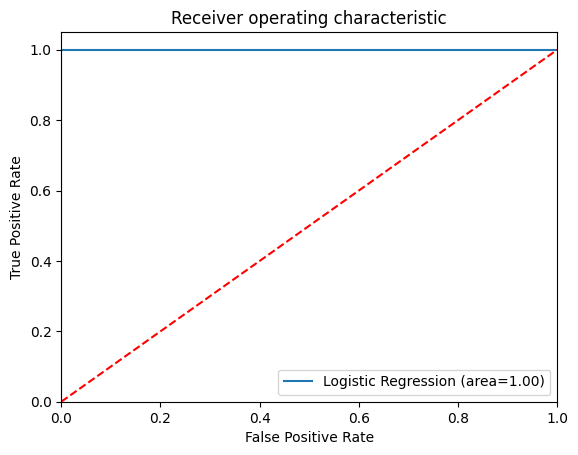

In [23]:
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   